In [244]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from param.ipython import green
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import scipy
from scipy import stats
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, LeakyReLU
from tensorflow.keras.models import load_model
import os
from keras import regularizers
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import pydot

#importing of all necessary libraries


In [245]:
data = pd.read_csv('Student_performance_data _.csv')#loads data from csv file into a pandas dataframe

In [246]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0



** INFO
- gender 0 = male, 1 = female
- parental education none 0 -> 4 higher
- ethnicitiy 0= caucasian, 1=african american, 2=asian, 3=other
- tutoring, extracurricular, sports, music (activity), volunteering: 0=no, 1=yes
- parentalsupport 0=none -> 4=very high

In [247]:
print(data.isnull().sum()) #data already has no null values so no row dropping/ column mean calculating is required to clean the data

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [248]:
data.info()#used to see info on the dataset, we have 2392 entries for the data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


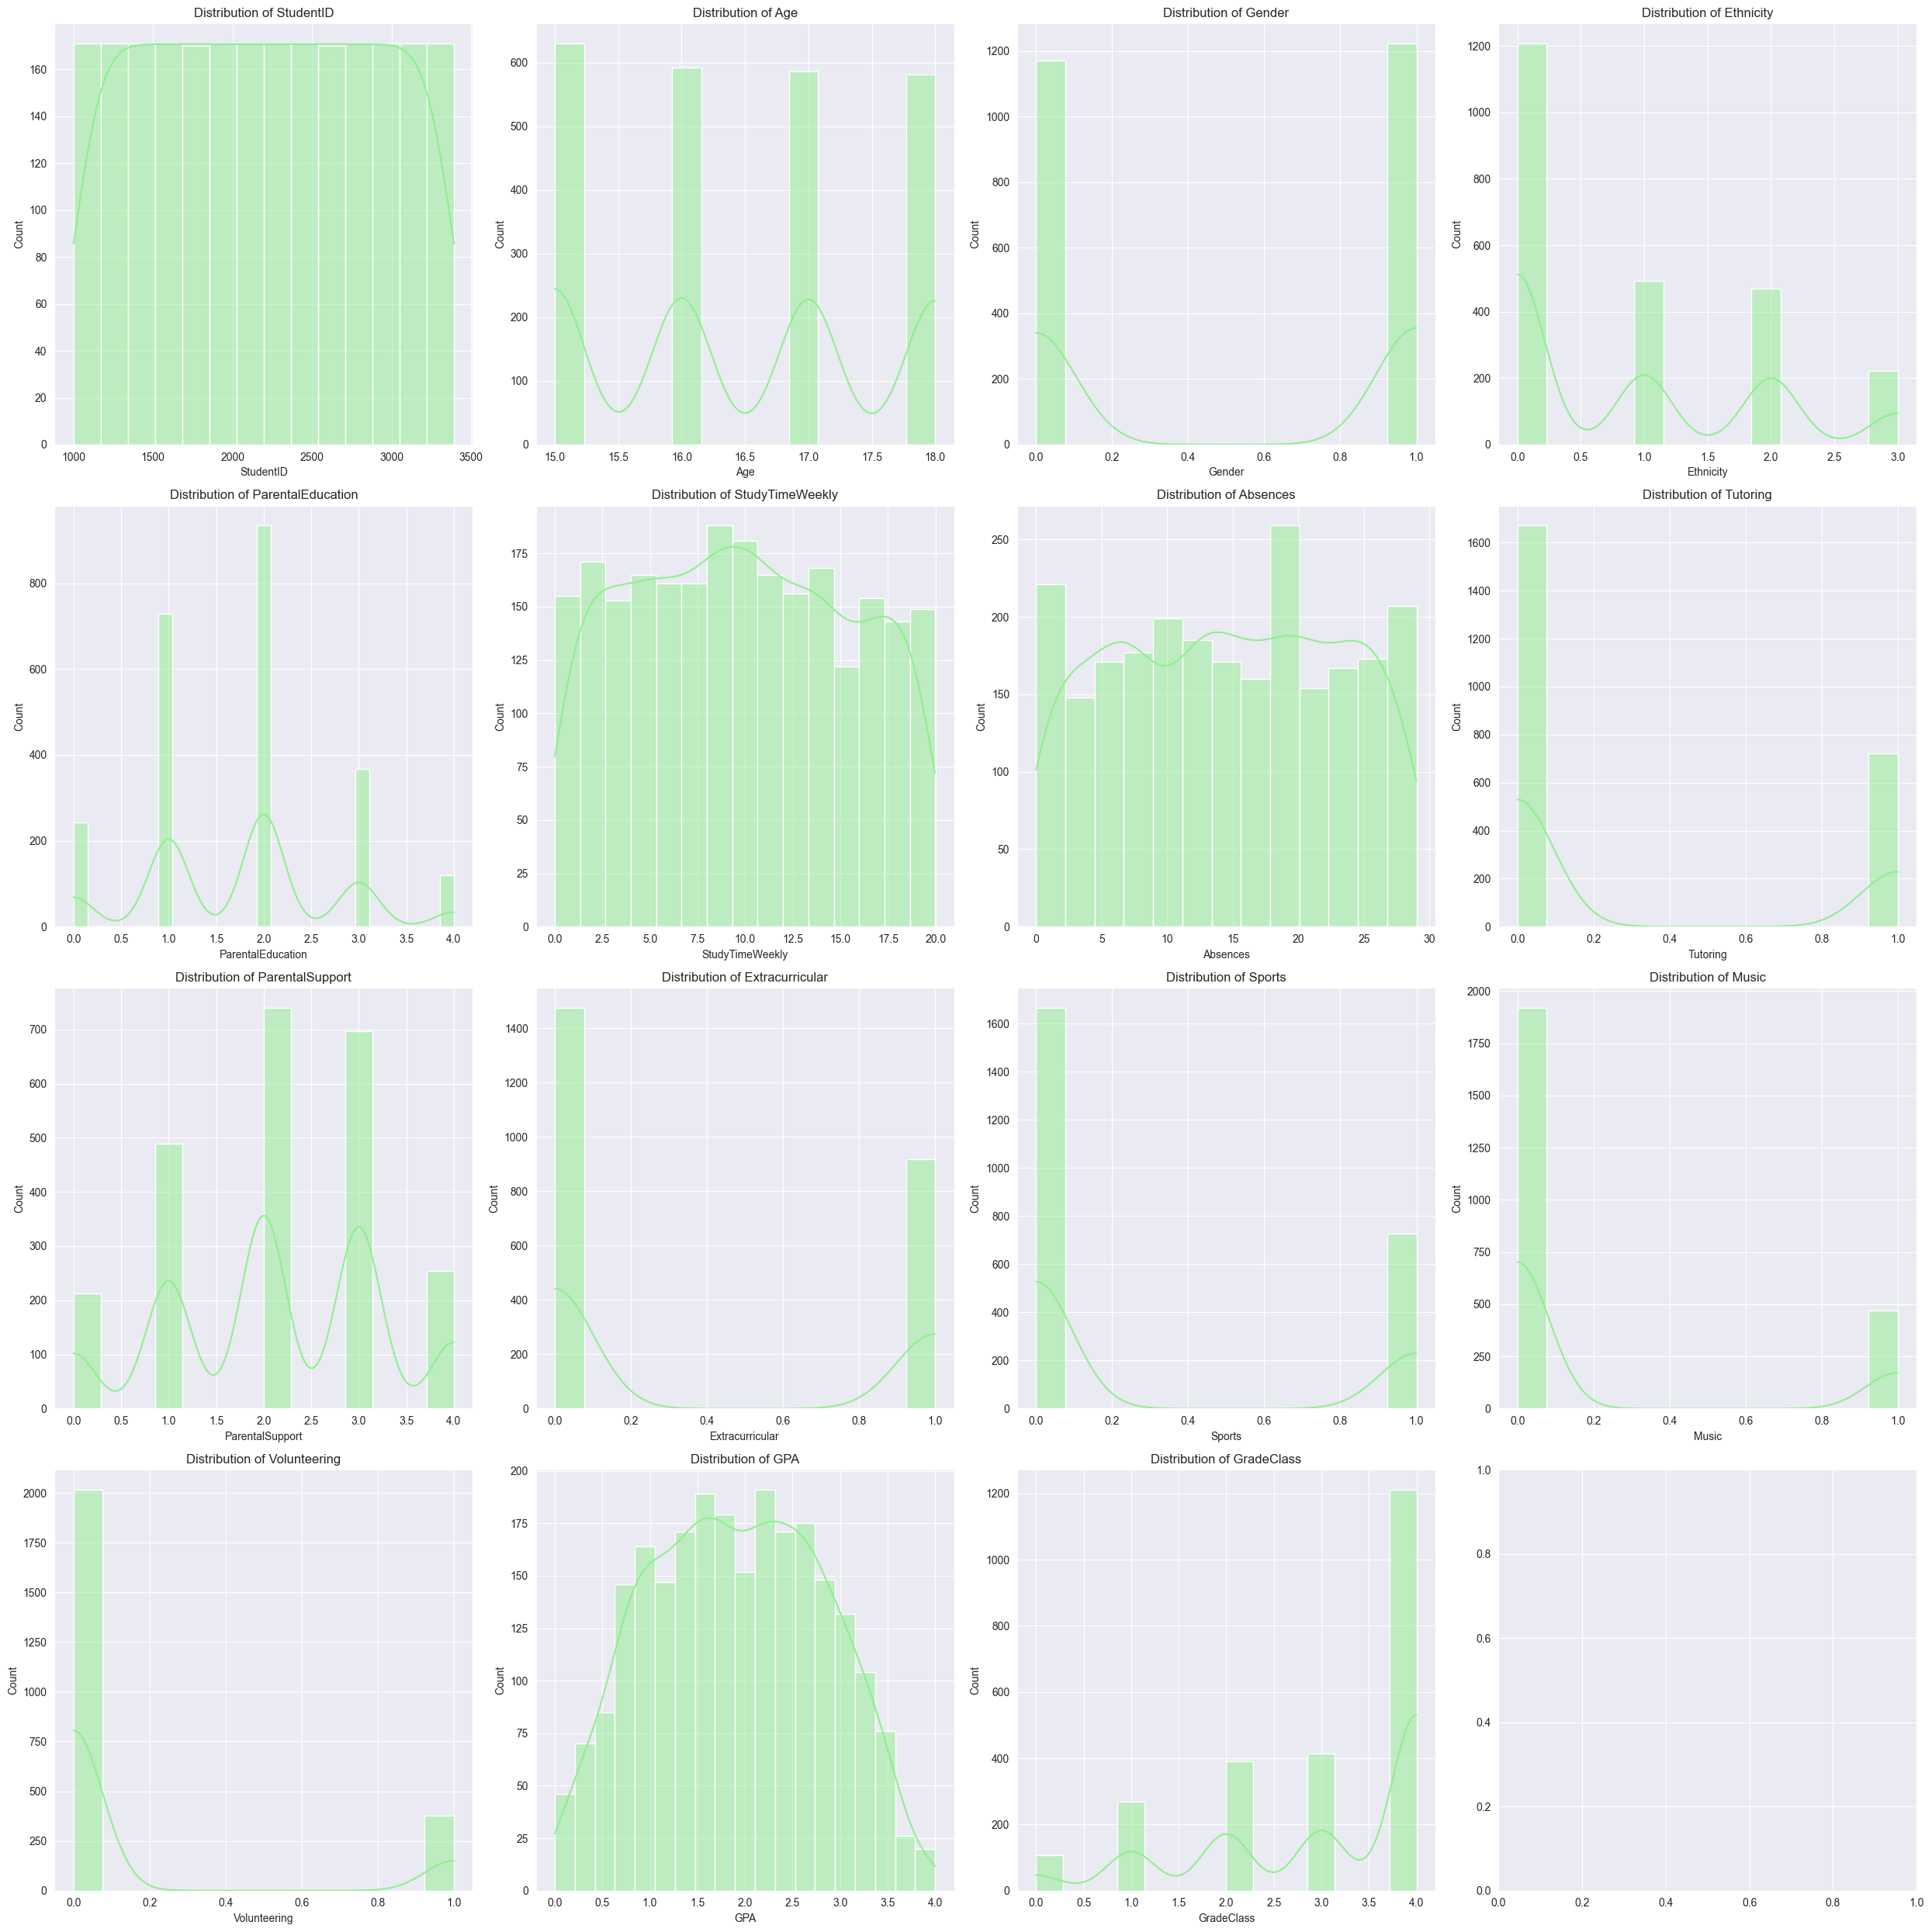

In [249]:
fig, axes = plt.subplots(4, 4, figsize=(25, 25)) #sets a 4,4 figure 
axes = axes.flatten()# reformats the axes to be in a list, making them iteratable in code
print(axes)

i=0

#creates histoplots to display distributions for each of the features
#Andrew: comment why you choise histoplots rather than countplot
for column in data.columns:
    sns.histplot(data[column], kde=True, color='lightgreen', ax=axes[i])
    axes[i].set_title("Distribution of " +str(column))
    i += 1

#displays the plots
plt.tight_layout()
plt.show()

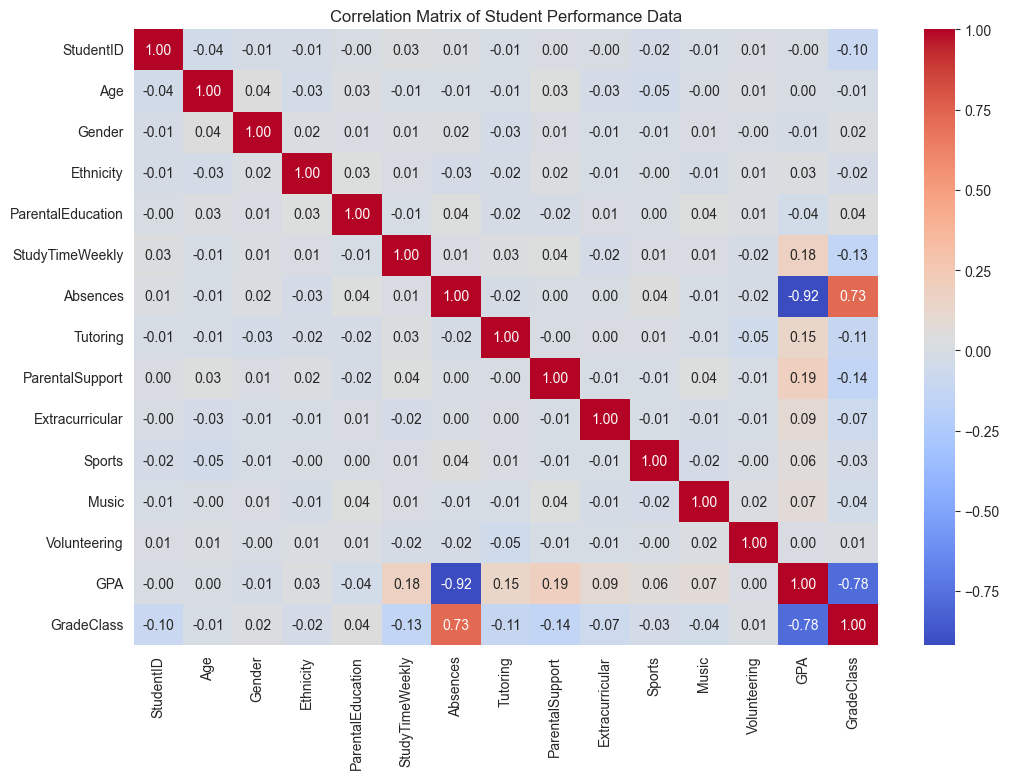

In [250]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Student Performance Data")
plt.show()


- Establishes a correlation matrix to see the correlation between each of the features wth each other. Thisll help narrow down which features have the greatest contribution to predicting grade class.

- Notes: A=0 - E=5, The lower the grade class the better it is, so the higher the GPA, the lower the grade class. 

- Anything that increases Grade class is a negative influence, anything that decreases grade class (negative number) is a positive influence

In [251]:
data = data.drop(columns=['StudentID', 'Age', 'Gender', 'Ethnicity', 'GPA' ]) 
data.head()

,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,2,19.833723,7,1,2,0,0,1,0,2.0
1,1,15.408756,0,0,1,0,0,0,0,1.0
2,3,4.210570,26,0,2,0,0,0,0,4.0
3,3,10.028829,14,0,3,1,0,0,0,3.0
4,2,4.672495,17,1,3,0,0,0,0,4.0


- Drops columns that would cause the AI to create a bias based on traits that shouldn't be taken into account. or in the case of studentID somehow having a correlation with improving the grade class.

- GPA is dropped as grade class is determined solely by it, we want to find how other attributes impact the grade class.

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: >]


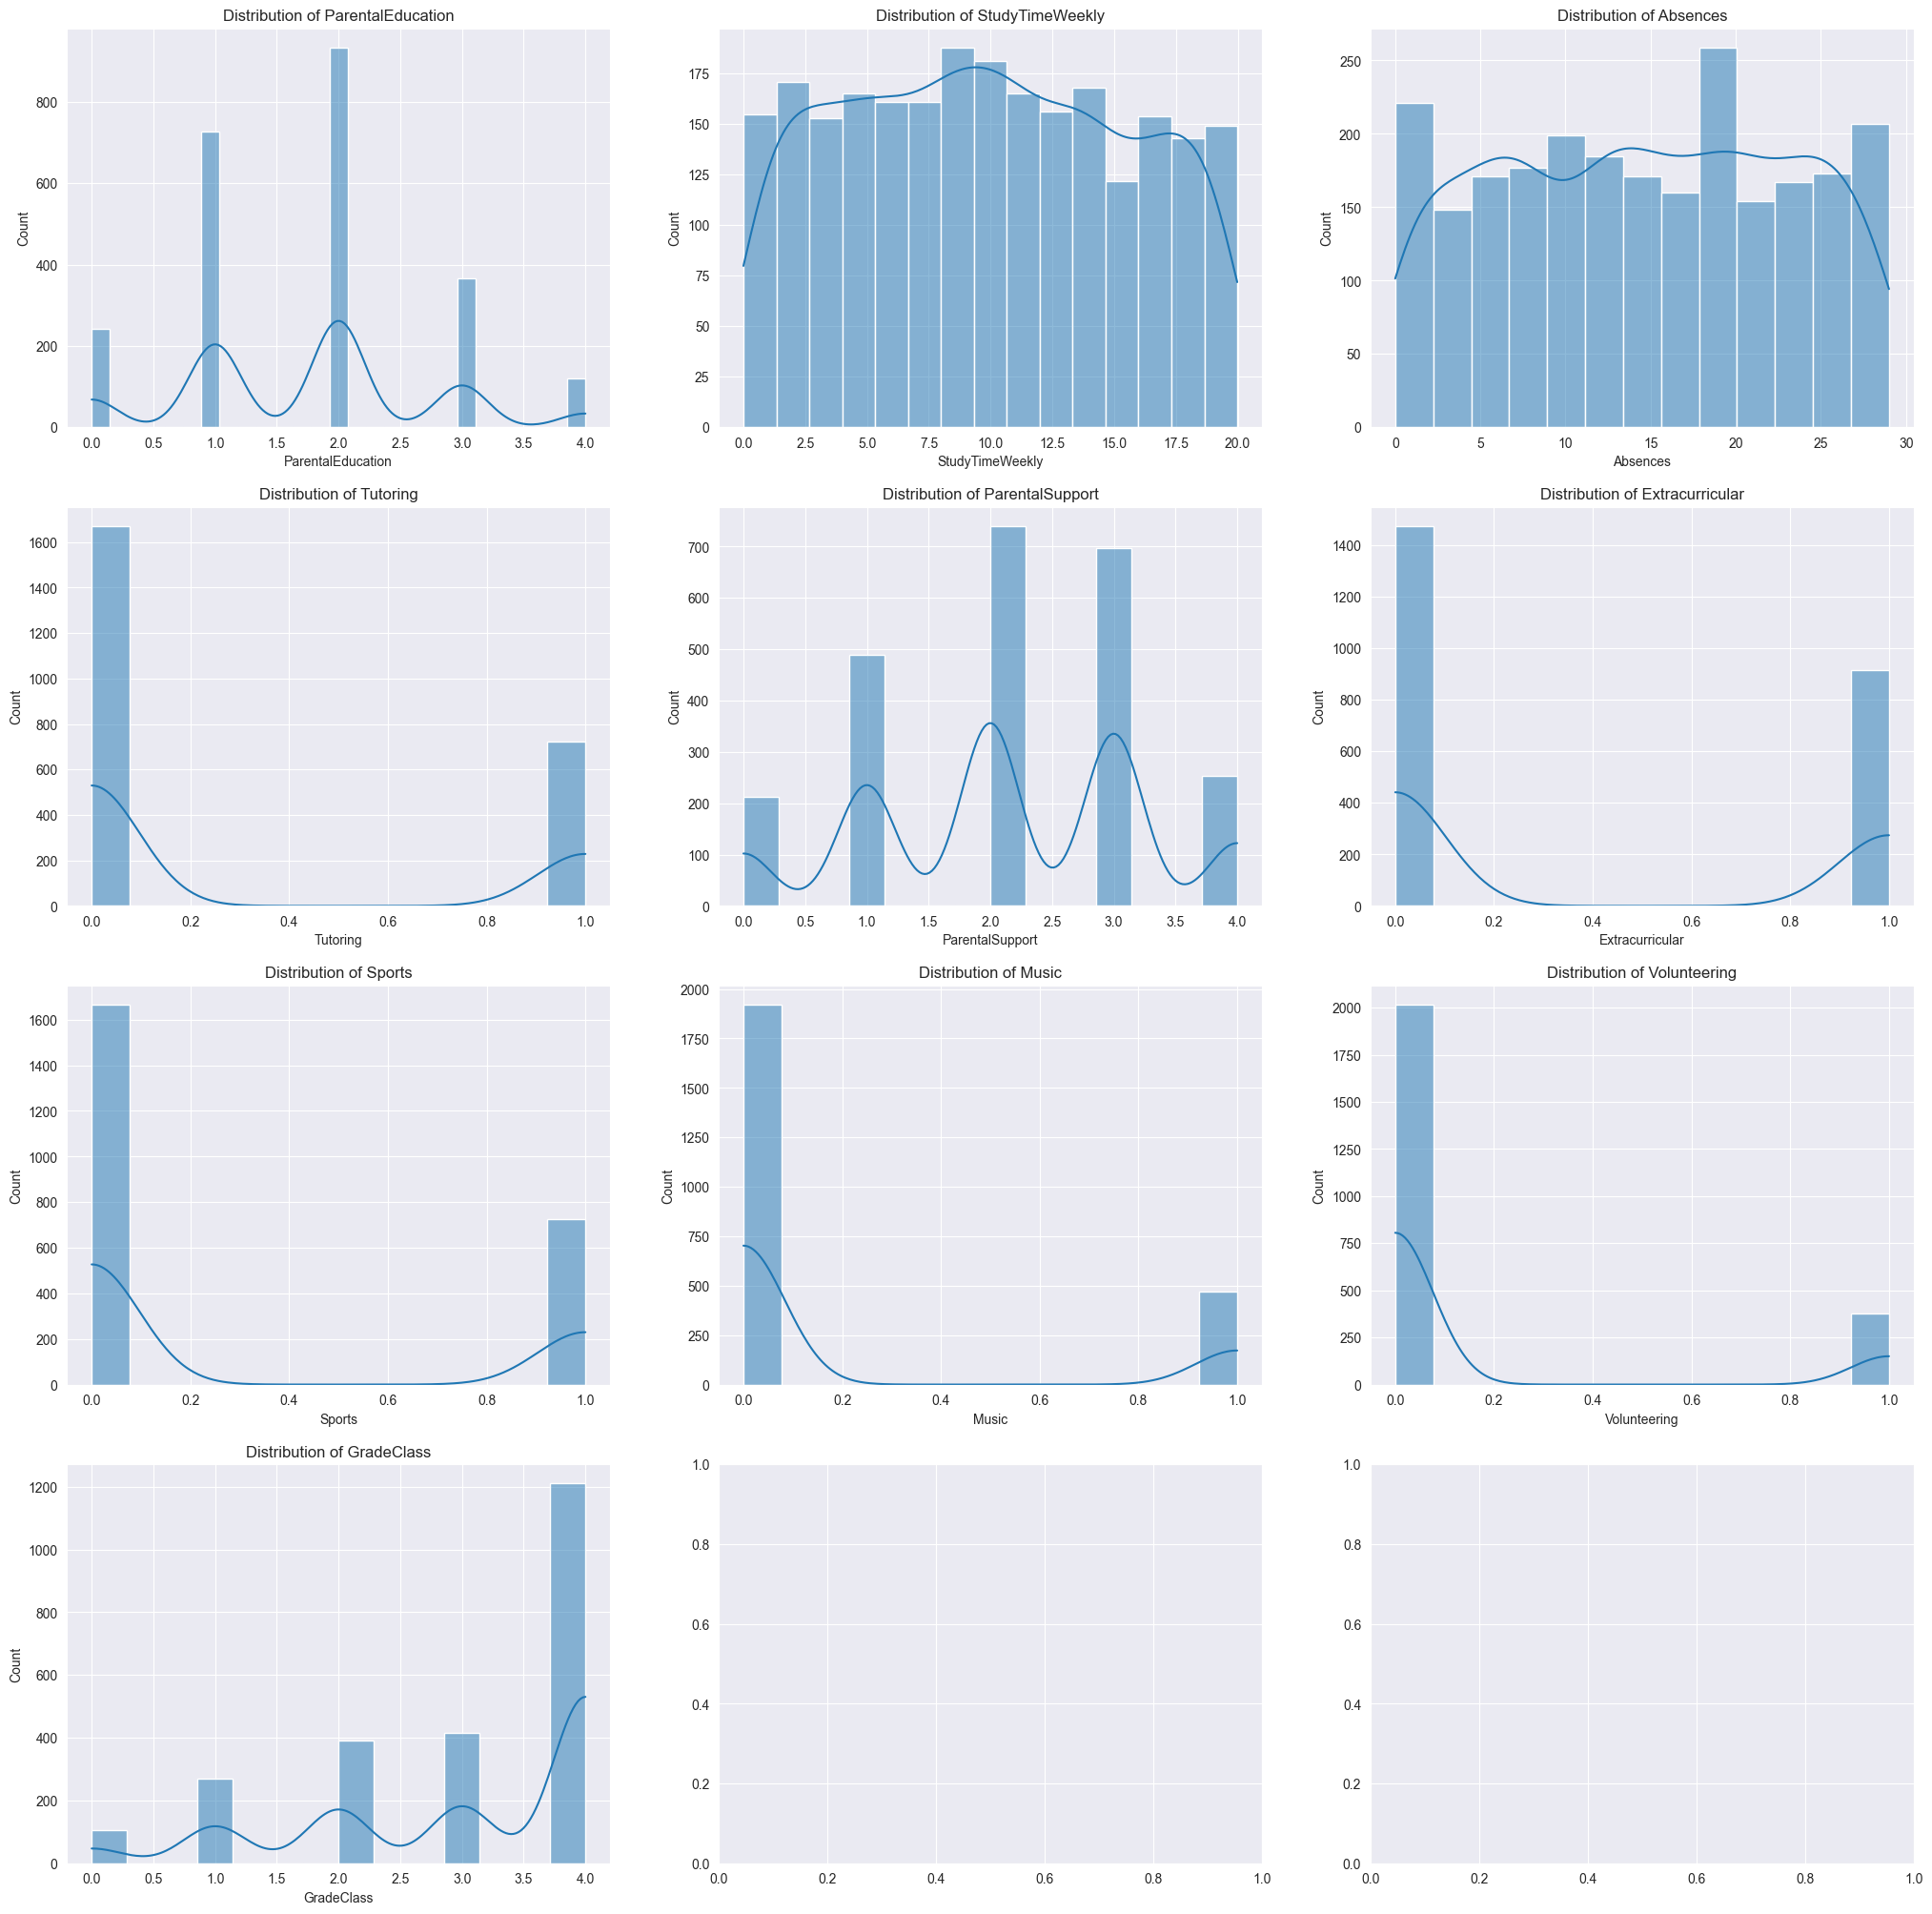

In [252]:
fig, axes = plt.subplots(4, 3, figsize=(25, 25)) #sets a 4,3 figure, smaller as now we have less columns to worry about 
axes = axes.flatten()# reformats the axes to be in a list, making them iteratable in code
print(axes)

i=0

#creates histoplots to display counts of each of the update feature columns
#Andrew: comment why you choise histoplots rather than countplot
for column in data.columns:
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title("Distribution of " +str(column))
    i += 1

- We can clearly see that the distribution of GradeClass in bottom right graph is not balanced.
=> We will be using SMOTE technique later on

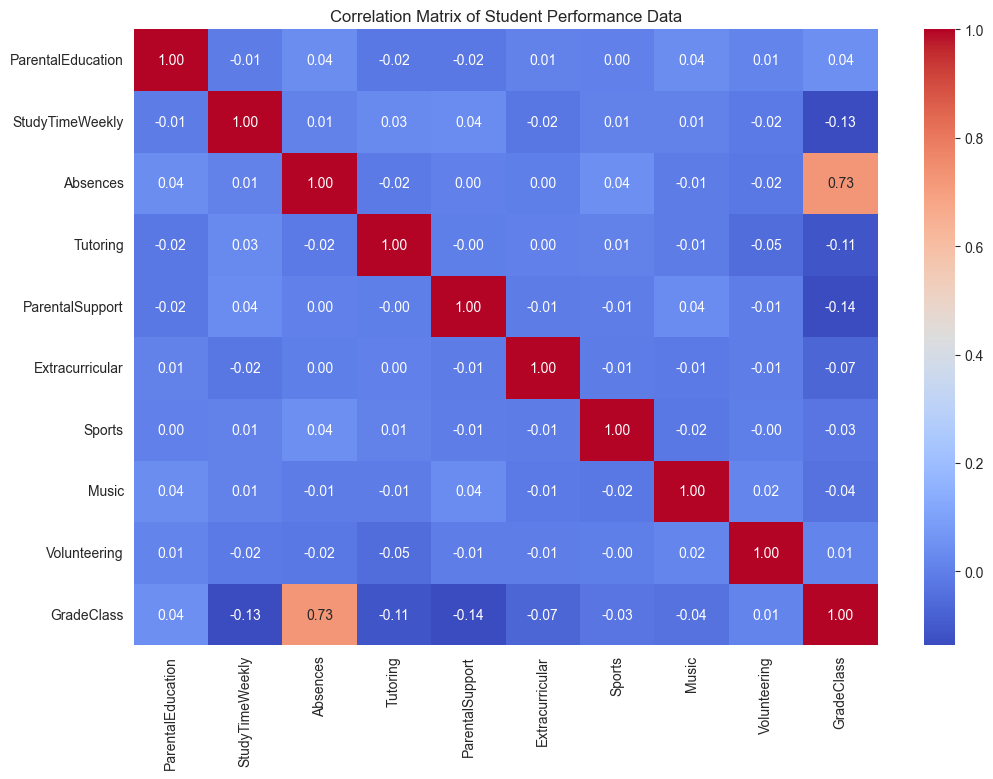

,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,2,19.833723,7,1,2,0,0,1,0,2.0
1,1,15.408756,0,0,1,0,0,0,0,1.0
2,3,4.210570,26,0,2,0,0,0,0,4.0
3,3,10.028829,14,0,3,1,0,0,0,3.0
4,2,4.672495,17,1,3,0,0,0,0,4.0


In [253]:
correlation_matrix = data.corr()#creates another correlation matrix between the remaining feature columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Student Performance Data")
plt.show()  

data.head()

- As seen in the table above, there is quite a lot of variance between scales in the features. The majority of features use a 1 yes or 0 no for its value or a scale between 0 and 4 to describe level of said feature like eg, parental support 4 = high level of support. On the other hand, we have study time weekly and absences which uses a completely different scale than that of the others. In order to avoid any potential imbalances, standardization will be applied to any values that aren't categorical representations: StudyTimeWeekly and Absences.

In [254]:
#converts studytimeweekly and absences into standardized zscore values
data['StudyTimeWeekly'] = stats.zscore(data['StudyTimeWeekly'])
data['Absences'] = stats.zscore(data['Absences'])
#comment this block out to have an easy direct comparison between non-standardized and standardized final model

#normalise values

#print(data['Absences'])
#print(data['StudyTimeWeekly'])

data.head()

,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,2,1.780336,-0.890822,1,2,0,0,1,0,2.0
1,1,0.997376,-1.717694,0,1,0,0,0,0,1.0
2,3,-0.984045,1.353542,0,2,0,0,0,0,4.0
3,3,0.045445,-0.063951,0,3,1,0,0,0,3.0
4,2,-0.902311,0.290422,1,3,0,0,0,0,4.0


- Now that the redundant columns have been dropped and the data has been standardized, we must focus on rebalancing the data for training, currently as it stands, the grade class distribution is heavily leaning towards lower grades than higher grades.
- Oversampling technique will be used to sample from the classes repeatedly that have been under-represented.

['ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']


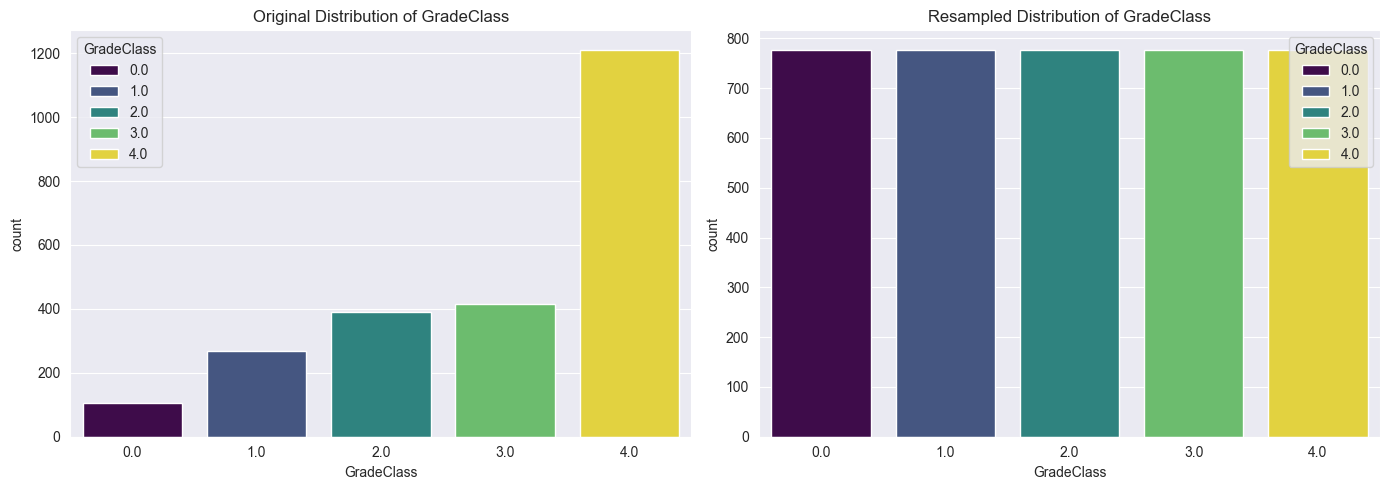

In [255]:
xColumns = [] #assigns empty list to hold all column names of x
for x in data.columns: #for each column in the datas columns
    if x != 'GradeClass': #if the column isn't the target grade class column 
        xColumns.append(x) #add said column to the list of
 
print(xColumns)   
X = data[xColumns].values#takes the values the columns and assigns them to x
y = data['GradeClass'].values #assign the remaining column values of GradeClass as Y
#print(X)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splits data into training and testing ensuring it'll always result in the same split that has been the result of state 42.

#could not enter 6 values into the above code so the splitting of train test and val sets had to be split into 2 lines of code. The code below takes the already split training data and splits it again into train and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#resamples the data to using consistent state of 42
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train) #resamples the data

#create figure canvas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#countplot of regular distribution
sns.countplot(x="GradeClass", data=data, palette="viridis",hue="GradeClass" , ax=axes[0])
axes[0].set_title("Original Distribution of GradeClass")

#converts the resampled data to a dataframe which we can use to create a diagram from
data_resampled = pd.DataFrame(X_resampled, columns=xColumns) #creating a data frame using values X_resampled with original columns
data_resampled['GradeClass'] = y_resampled  #adding a new y column to said dataframe as the target column of GradeClass

#creates countplot from the resampled data
sns.countplot(x="GradeClass", data=data_resampled, palette="viridis", hue="GradeClass", ax=axes[1])
axes[1].set_title("Resampled Distribution of GradeClass")

#display the plots
plt.tight_layout()
plt.show()

As seen with the results above, the data has been successfully resample. INCLUDE A COMPARISON BETWEEN ACCURACY OF NON-RESAMPLE AI VS. RESAMPLED AI

In [256]:
data.info()
data_resampled.info()
data_resampled.head()

#analyse data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  2392 non-null   int64  
 1   StudyTimeWeekly    2392 non-null   float64
 2   Absences           2392 non-null   float64
 3   Tutoring           2392 non-null   int64  
 4   ParentalSupport    2392 non-null   int64  
 5   Extracurricular    2392 non-null   int64  
 6   Sports             2392 non-null   int64  
 7   Music              2392 non-null   int64  
 8   Volunteering       2392 non-null   int64  
 9   GradeClass         2392 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 187.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885 entries, 0 to 3884
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  3885 non-null   float64
 1   StudyTime

,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,1.0,0.023774,1.235418,0.0,3.0,1.0,1.0,0.0,0.0,3.0
1,1.0,-0.900779,0.644796,0.0,3.0,0.0,0.0,0.0,1.0,4.0
2,2.0,-0.517851,-0.182076,0.0,0.0,0.0,0.0,1.0,0.0,4.0
3,1.0,1.789543,-1.481445,0.0,3.0,1.0,0.0,0.0,0.0,0.0
4,3.0,0.890770,0.644796,0.0,4.0,0.0,0.0,0.0,0.0,4.0


In [257]:
#the next step involves creating baseline classifiers. Both random prediction and zero rule will be made as demonstration of our knowledge but the ZeroR baseline classifier will be used for the model accuracy comparison as it is more closely related to the dataset and gives a better reflection of what the baseline accuracy should be.

#first, a test set dataframe is constructed to analyse the information on it
data_test = pd.DataFrame(X_test, columns=xColumns) #creating a data frame using values X_resampled with original columns
data_test['GradeClass'] = y_test  #adding a new y column to said dataframe as the target column of GradeClass

data_test.head()
data_test.info()
data_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  479 non-null    float64
 1   StudyTimeWeekly    479 non-null    float64
 2   Absences           479 non-null    float64
 3   Tutoring           479 non-null    float64
 4   ParentalSupport    479 non-null    float64
 5   Extracurricular    479 non-null    float64
 6   Sports             479 non-null    float64
 7   Music              479 non-null    float64
 8   Volunteering       479 non-null    float64
 9   GradeClass         479 non-null    float64
dtypes: float64(10)
memory usage: 37.6 KB


,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,1.674322,0.016596,-0.036331,0.298539,2.048017,0.396660,0.298539,0.192067,0.160752,2.974948
std,1.044205,0.964923,0.991924,0.458095,1.138794,0.489716,0.458095,0.394337,0.367686,1.223634
min,0.000000,-1.728882,-1.717694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-0.806210,-0.890822,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.000000,0.058625,-0.063951,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,2.000000,0.820712,0.881045,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,4.000000
max,4.000000,1.805881,1.707916,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [258]:
#from the test data set, we can see that the test set has 479 rows

#first step is to create the random prediction baseline classifier.
GradeClassCount = data_test['GradeClass'].value_counts()
rpbc_output = 0
total = data_test['GradeClass'].count()
for grade in GradeClassCount:
    # print(grade)
    # print(total)
    rpbc_output += ((grade/total)*(grade/total)) #the calculation for random baseline classifier is grade x count (eg 22 A grades)/ total (all grade counts summed), times by itself and summed together, Finally a *100 is performed on it. The
rpbc_output = rpbc_output * 100

#second step is to see the most frequent class which is 4.0 with a total count of 237 students. The total of all students within the test set is 479. Therefore, the zero rule baseline classifier accuracy is 273/479 
print(data_test['GradeClass'].value_counts())
print("Total data samples: " +str(data_test['GradeClass'].count()))
accuracy_zeroR = 237/479

print("---------")
print("Random prediction baseline classifier: " +str(rpbc_output))
print("ZeroR baseline classifier: "+str(accuracy_zeroR)) 

#using random baseline classifier is ill advised as it doen't produce a baseline as good as zero R. By taking the highest appearing class and dividing it by the total we get a higher baseline classifier value to compare to. Random prediction still included as proof of understanding and research done.

GradeClass
4.0    237
3.0     86
2.0     85
1.0     49
0.0     22
Name: count, dtype: int64
Total data samples: 479
---------
Random prediction baseline classifier: 32.11065154004733
ZeroR baseline classifier: 0.49478079331941544


In [259]:

#creating the model
model = Sequential() 
model.add(Input(shape=(X_resampled.shape[1],)))#9 inputs nodes
model.add(Dropout(0.1))

model.add(Dense(64, kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))#going into layer 1 with 64 nodes, activation function relu
model.add(LeakyReLU(negative_slope=0.3)) 
model.add(Dropout(0.1))

model.add(Dense(32, kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))#going into relu layer 2 with 32 nodes
model.add(LeakyReLU(negative_slope=0.3)) 
model.add(Dropout(0.1))

model.add(Dense(64, kernel_regularizer=regularizers.L1L2(l1=0.01, l2=0.01)))#going into relu layer 3 with 64 nodes again
model.add(LeakyReLU(negative_slope=0.3)) 
model.add(Dropout(0.1))

model.add(Dense(5, activation='softmax'))#going into an output layer with the softmax function to transform the output into a list of probabilities for each of the grade classes

#establishes a neural network structure 
#DRAW A DIAGRAM FOR THIS IN THE REPORT
#the diagram has a 

#takes the structure of the model and turns it into a infromational diagram 
#code snippet taken from keras documentation
# keras.utils.plot_model(
#     model,
#     to_file="model.png",
#     show_shapes=True,
#     show_dtype=True,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=200,
#     show_layer_activations=True,
#     show_trainable=False,
# )

#taken from keras documentation on Adam optimizer
optimizer = keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name="adam",
)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])#model is compiled using sparse cross entropy loss as it is intended for multiclass classification tasks that are encoded as integers 0 1 2 rather than one hot encoded as [0,1,0] , softmax used to transform outputs into probabilities
model.summary() #a model summary of structure is given

#defines early stopping to prevent overtraining, taken from official keras documentation
earlyStop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,#no minimum change needed to occur
    patience=250,#stops after 250 epochs of no improvement
    verbose=1,
    mode="auto",
    baseline=accuracy_zeroR,#sets the baseline for improvement to be over the Zero R baseline accuracy
    restore_best_weights=True,
    start_from_epoch=0,
)

#training the model normally, verbose 2 to show all detail, for 1000 epochs but with early stop implemented with batch sizes of 32
model.fit(X_resampled,y_resampled,validation_data=(X_val, y_val), verbose=2,epochs=1000, batch_size=32, callbacks=[earlyStop])

#training the model on the original non oversampled data with high varience in target class distribution
#model.fit(X_train,y_train,validation_data=(X_val, y_val), verbose=2,epochs=1000, batch_size=32, callbacks=[earlyStop])

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_96 (Dropout)            │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_98 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,157 (20.14 KB)

 Trainable params: 5,157 (20.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
122/122 - 2s - 19ms/step - accuracy: 0.3264 - loss: 5.9977 - val_accuracy: 0.5379 - val_loss: 3.7742
Epoch 2/1000
122/122 - 0s - 1ms/step - accuracy: 0.3869 - loss: 2.7310 - val_accuracy: 0.6397 - val_loss: 1.7615
Epoch 3/1000
122/122 - 0s - 1ms/step - accuracy: 0.3985 - loss: 1.7393 - val_accuracy: 0.5718 - val_loss: 1.4437
Epoch 4/1000
122/122 - 0s - 1ms/step - accuracy: 0.4044 - loss: 1.6126 - val_accuracy: 0.6815 - val_loss: 1.3708
Epoch 5/1000
122/122 - 0s - 1ms/step - accuracy: 0.4077 - loss: 1.5610 - val_accuracy: 0.5509 - val_loss: 1.3289
Epoch 6/1000
122/122 - 0s - 1ms/step - accuracy: 0.4183 - loss: 1.5371 - val_accuracy: 0.5979 - val_loss: 1.2716
Epoch 7/1000
122/122 - 0s - 1ms/step - accuracy: 0.4221 - loss: 1.5116 - val_accuracy: 0.6580 - val_loss: 1.2837
Epoch 8/1000
122/122 - 0s - 1ms/step - accuracy: 0.4371 - loss: 1.4991 - val_accuracy: 0.6684 - val_loss: 1.2756
Epoch 9/1000
122/122 - 0s - 1ms/step - accuracy: 0.4492 - loss: 1.4786 - val_accuracy: 0.7232 -

- Below are the specifications of the Adam optimizer
# keras.optimizers.Adam(
#     learning_rate=0.001,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07,
#     amsgrad=False,
#     weight_decay=None,
#     clipnorm=None,
#     clipvalue=None,
#     global_clipnorm=None,
#     use_ema=False,
#     ema_momentum=0.99,
#     ema_overwrite_frequency=None,
#     loss_scale_factor=None,
#     gradient_accumulation_steps=None,
#     name="adam",
#     **kwargs
# )

In [260]:
#----------------------------------
#CREATING THE NEURAL NETWORK - Jakub
#-----------------------------------

In [261]:
    #outputs the accuracy of the prediction by predicting on test data x against the y test results
prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis=1)
score = metrics.accuracy_score(y_test, prediction)


print("Accuracy: " +str(score))
print(" ")

#produces a classification grid, which shows the accuracy for each class, total accuracy as well as precision, recall, f1 score and the total amounts in said class (support). I took this part from Andrews code which is why later down the line you can see my code for manually doing this rather than using classification_report.
print("Classification Report:\n", classification_report(y_test, prediction))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.7473903966597077
 
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.14      0.23        22
         1.0       0.60      0.43      0.50        49
         2.0       0.63      0.66      0.64        85
         3.0       0.58      0.71      0.64        86
         4.0       0.89      0.92      0.90       237

    accuracy                           0.75       479
   macro avg       0.69      0.57      0.58       479
weighted avg       0.75      0.75      0.74       479



In [262]:
savePath = "."
#model.save(os.path.join(savePath,"NeuralNetwork2.keras"))
#saves the model for later usage with trained weights

Saving the model

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\Unliv\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Network Model Accuracy: 0.7160751565762005
 
Classification Report:
               precision    recall  f1-score   support

         0.0       0.28      0.23      0.25        22
         1.0       0.52      0.49      0.51        49
         2.0       0.60      0.53      0.56        85
         3.0       0.56      0.62      0.59        86
         4.0       0.88      0.91      0.89       237

    accuracy                           0.72       479
   macro avg       0.57      0.55      0.56       479
weighted avg       0.71      0.72      0.71       479

---------------------------------------------
Neural Network Non-Oversampled Model Accuracy: 0.7306889352818372
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.14      0.24        22
         1.0       0.56      0.49      0.52        49
         2.0       0.57      0.72      0.64        85
         3.0       0.58      0.49      0.53

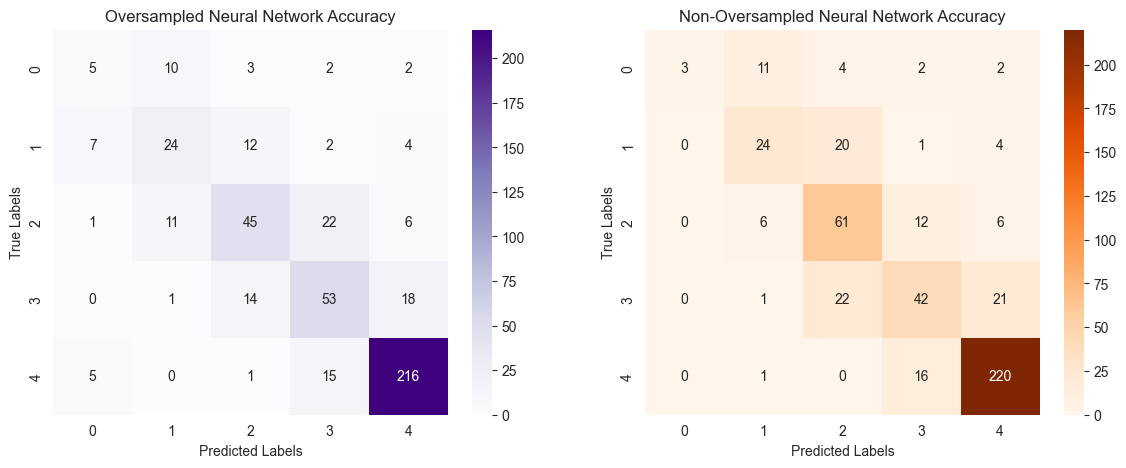

Classification Report:
               precision    recall  f1-score   support

         0.0       0.28      0.23      0.25        22
         1.0       0.52      0.49      0.51        49
         2.0       0.60      0.53      0.56        85
         3.0       0.56      0.62      0.59        86
         4.0       0.88      0.91      0.89       237

    accuracy                           0.72       479
   macro avg       0.57      0.55      0.56       479
weighted avg       0.71      0.72      0.71       479

--------------
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.14      0.24        22
         1.0       0.56      0.49      0.52        49
         2.0       0.57      0.72      0.64        85
         3.0       0.58      0.49      0.53        86
         4.0       0.87      0.93      0.90       237

    accuracy                           0.73       479
   macro avg       0.71      0.55      0.56       479
weighted avg  

In [263]:

#code for loading model and predicting the result based on the testing set, also calculates the accuracy score for said model
modelNN = load_model(os.path.join(savePath, "NeuralNetwork.keras"))
# modelNN = load_model(os.path.join(savePath, "NeuralNetworkNonStandardized.keras"))
predictionNN = modelNN.predict(X_test)#perofmr prediciton using loaded model
predictionNN = np.argmax(predictionNN, axis=1)
score = metrics.accuracy_score(y_test, predictionNN)#accuracy of trained neural netowrk model

#code for loading the non oversampled model and predicting the result based on the testing set, also calculates the accuracy score for said model
modelNN_NonOversampled = load_model(os.path.join(savePath, "NeuralNetworkNonOversampled2.keras"))
predictionNN_NonOversampled = modelNN_NonOversampled.predict(X_test)
predictionNN_NonOversampled = np.argmax(predictionNN_NonOversampled, axis=1)
scoreNonOversampled = metrics.accuracy_score(y_test, predictionNN_NonOversampled)

#prints the calculated accuracies of each model, non-standardized not included as it requires the code to be rerun with the zscores commented out therefore it cannot be displayed in the same run as the zscore updated models without overcomplicating the code
print("Neural Network Model Accuracy: " +str(score))
print(" ")
print("Classification Report:\n", classification_report(y_test, predictionNN))
print("---------------------------------------------")

print("Neural Network Non-Oversampled Model Accuracy: " +str(scoreNonOversampled))
print("Classification Report:\n", classification_report(y_test, predictionNN_NonOversampled))
print("---------------------------------------------")


#the non-standardized data set has proven to on average have slightly higher accuracy scores however it'll not be used going forward as not standardizing data for neural networks would be bad practice, especially if its only to receive roughly a 3% boost in accuracy.

#the below code finds the accuracy of just the specific class eg. grade A and sees how the non oversampled and oversampled models performed when predicting it

for i in range(0,5):
    desiredClass = i #sets the desired class im looking for, eg. desiredClass = 0 would be to find the accuracy of all the A grades
    desiredResult = np.where(y_test == desiredClass)[0]#selects all the values where y is equal to the class label. eg. where y = 4 (=E grade)
    desiredResultOfModelPrediction = predictionNN[desiredResult]#finds said desired result from the prediction of the model
    desiredResultActual = y_test[desiredResult]#find the desired class of the test
    accuracyOfDesiredClass = accuracy_score(desiredResultActual, desiredResultOfModelPrediction)#compares the accuracy it obtained between predicting the class and what the actual class was

    print("-----------------------------")
    print("Accuracy of class "+str(desiredClass)+" (normal model) = "+str(accuracyOfDesiredClass))


    desiredResult = np.where(y_test == desiredClass)[0]#selects all the values where y is equal to the class label. eg. where y = 4 (=E grade)
    desiredResultOfModelPrediction = predictionNN_NonOversampled[desiredResult]#finds said desired result from the prediction of the model
    desiredResultActual = y_test[desiredResult]#find desired result of class fromt test
    accuracyOfDesiredClass = accuracy_score(desiredResultActual, desiredResultOfModelPrediction)#compare accuracies between actual desired result and the prediction

    print("Accuracy of class "+str(desiredClass)+" (non-oversampled model) = "+str(accuracyOfDesiredClass))
    
# #displays comparison of class disstribution between regular data and resampled data    
# fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# sns.countplot(x="GradeClass", data=data, palette="viridis",hue="GradeClass" , ax=axes[0])
# axes[0].set_title("Original Distribution of GradeClass")
# sns.countplot(x="GradeClass", data=data_resampled, palette="viridis", hue="GradeClass", ax=axes[1])
# axes[1].set_title("Resampled Distribution of GradeClass")

#creates confusion matrices of the two different model predictions
cmOversampled = confusion_matrix(y_test, predictionNN)
cmNonOversampled = confusion_matrix(y_test, predictionNN_NonOversampled)

print("-----------------")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#plot oversampled nn heatmap
sns.heatmap(cmOversampled,annot=True,fmt="d",cmap="Purples", cbar=True, ax=axes[0])
axes[0].set_title('Oversampled Neural Network Accuracy')

#plot non oversampled heatmap
sns.heatmap(cmNonOversampled,annot=True,fmt="d",cmap="Oranges", cbar=True, ax=axes[1])
axes[1].set_title('Non-Oversampled Neural Network Accuracy')

#set labels for each
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

#show plots
plt.show()

print("Classification Report:\n", classification_report(y_test, predictionNN))
print("--------------")
print("Classification Report:\n", classification_report(y_test, predictionNN_NonOversampled))


- In the results above, you can see that when it came to the severly undersampled grade class 0, the accuracy was 9% higher in the oversampled model which was roughly a 70% increase in accuracy. the accuracy of predicting grade class 3 was also higher by 8% (15% increase in accuracy compared to non oversampled.
#However, the accuracy of predicting class 1 was worse by 20% accuracy (41% decrease from non oversampled), class 2 worse by 8% accuracy (15% decrease)
#class 3 being the most prominent class only had a 2% less accuracy (roughly 3% decrease from non oversampled)

- It is unclear wether the oversampled or non-oversampled model should be used. The oversampled model does have a signifcantly higher accuracy when predicting grade 0 and grade 3, but at the same time it has a significantly lower for predicting grades 1 and 2.


#---------------------------------
#CREATING THE SVM - Andrew
#--------------------------------

In [264]:
param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

Now we will be using GridSearchCV to create a settings of parameter for SVM before training. GridSearch will iterate over to find the best combination of parameters for optimal model performance.

- 'C' - Regularization parameter: It controls the trade-off between achieving a low training error and low testing error. In this case we are testing 0.1, 1, 10, 100 respectively. The lower the number the higher regularization strength, the model will aim for a larger margin even if it misclassifies more points. The higher number the model will try to classify all training examples correctly but could indicate overfitiing.

- 'kernel': Specifying the kernel type to be used in the algorithm 'linear': No transformation, suitable for linearly separable data 'rbf': (Radial Basis Function) Handles non-linear relationships by mapping data into higher-dimensional space. 'sigmoid': Similar to a two-layer neural network; can handle non-linear relationships.

- 'gamma': Kernel coefficient for 'rbf', and 'sigmoid' kernels. It defines how far the influence of a single training example reaches. 'scale': Default value; 1 / (n_features * X.var()). Considers feature variance. 'auto': 1 / n_features. Doesn't consider feature variance.

- 'class_weight': Adjusts the weights assigned to classes to handle class imbalance. None: All classes are treated equally. 'balanced': Weights are inversely proportional to class frequencies in the input data, giving more weight to minority classes.

In [265]:
svc = SVC(random_state=42)
 
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy Score:", grid_search.best_score_)
 
grid_search.fit(X_resampled, y_resampled)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy Score:", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validated Accuracy Score: 0.7457516339869281
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 100, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validated Accuracy Score: 0.8705276705276705


In [266]:
svm_original = SVC(C=10,kernel='linear',gamma='scale',class_weight=None, random_state=42)
svm_original.fit(X_train, y_train)
y_pred_original = svm_original.predict(X_test)

print("Performance on Original Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("Classification Report:\n", classification_report(y_test, y_pred_original))

#problem arised here Andrew

Performance on Original Data:
Accuracy: 0.7390396659707724
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.48      0.61      0.54        49
         2.0       0.62      0.64      0.63        85
         3.0       0.62      0.56      0.59        86
         4.0       0.88      0.94      0.91       237

    accuracy                           0.74       479
   macro avg       0.52      0.55      0.53       479
weighted avg       0.71      0.74      0.72       479



C:\Users\Unliv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Unliv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Unliv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [267]:
svm_resampled = SVC(C=100,kernel='rbf',gamma='auto',class_weight=None, random_state=42)
svm_resampled.fit(X_resampled, y_resampled)
y_pred_resampled = svm_resampled.predict(X_test)
print("\nPerformance on Resampled Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_resampled))


Performance on Resampled Data:
Accuracy: 0.6471816283924844
Classification Report:
               precision    recall  f1-score   support

         0.0       0.20      0.32      0.25        22
         1.0       0.41      0.47      0.44        49
         2.0       0.56      0.59      0.57        85
         3.0       0.51      0.44      0.47        86
         4.0       0.86      0.81      0.83       237

    accuracy                           0.65       479
   macro avg       0.51      0.53      0.51       479
weighted avg       0.67      0.65      0.65       479



In [268]:
default_svm = SVC(random_state=42)
default_svm.fit(X_resampled, y_resampled)
y_pred_resampled_default = default_svm.predict(X_test)
print("\nPerformance on Resampled Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_resampled_default))


Performance on Resampled Data:
Accuracy: 0.6471816283924844
Classification Report:
               precision    recall  f1-score   support

         0.0       0.26      0.45      0.33        22
         1.0       0.48      0.43      0.45        49
         2.0       0.58      0.52      0.55        85
         3.0       0.52      0.62      0.57        86
         4.0       0.90      0.83      0.86       237

    accuracy                           0.68       479
   macro avg       0.55      0.57      0.55       479
weighted avg       0.70      0.68      0.69       479



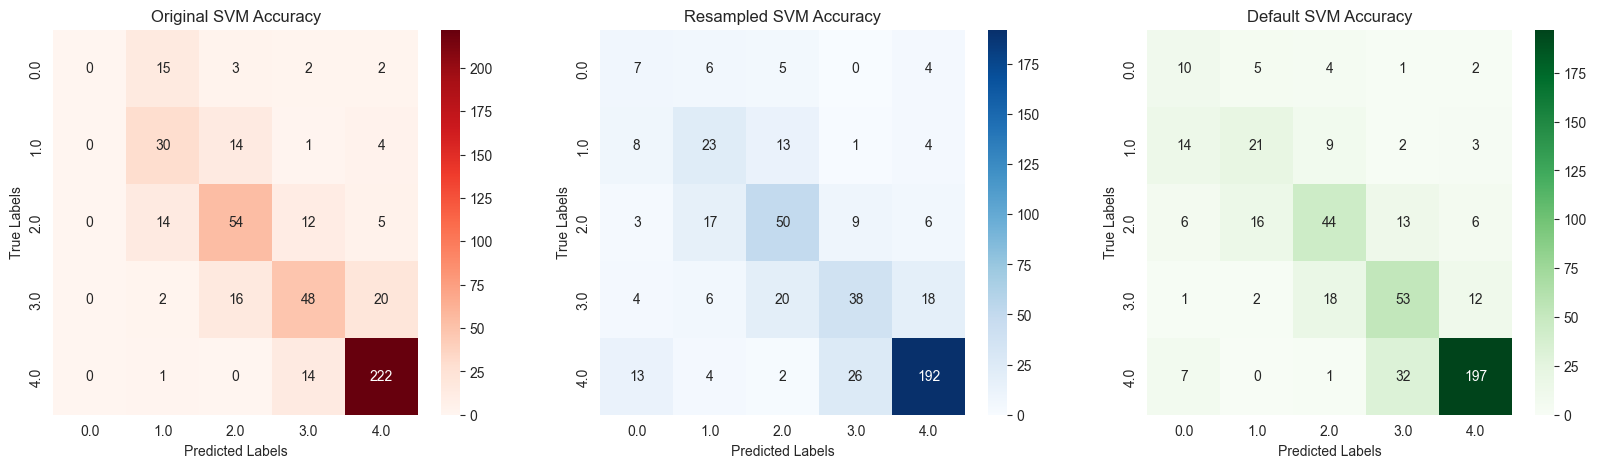

In [269]:
#creates confusion matrices for the svms
cmOriginal = confusion_matrix(y_test, y_pred_original)
cmResampled = confusion_matrix(y_test, y_pred_resampled)
cmDefault = confusion_matrix(y_test, y_pred_resampled_default)

# plt.figure(figsize=(10, 8))
# sns.heatmap(cm,annot=True,fmt="d",cmap="viridis", cbar=True,xticklabels=svm_original.classes_,yticklabels=svm_original.classes_,  )
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()

figure, axes = plt.subplots(1, 3, figsize=(20, 5))

#original svm heatmap
sns.heatmap(cmOriginal,annot=True,fmt="d",cmap="Reds", cbar=True,xticklabels=svm_original.classes_,yticklabels=svm_original.classes_, ax=axes[0] )
axes[0].set_title('Original SVM Accuracy')

#resampled svm heatmap
sns.heatmap(cmResampled,annot=True,fmt="d",cmap="Blues", cbar=True,xticklabels=svm_resampled.classes_,yticklabels=svm_resampled.classes_, ax=axes[1] )
axes[1].set_title('Resampled SVM Accuracy')

#Andrew write what this one is for and how it differs to the resampled
sns.heatmap(cmDefault,annot=True,fmt="d",cmap="Greens", cbar=True,xticklabels=default_svm.classes_,yticklabels=default_svm.classes_, ax=axes[2] )
axes[2].set_title('Default SVM Accuracy')

#sets labels for graphs
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
axes[2].set_xlabel("Predicted Labels")
axes[2].set_ylabel("True Labels")
plt.savefig('Comparison between SVMs Accuracy vs Predicted Labels.png')
plt.show()

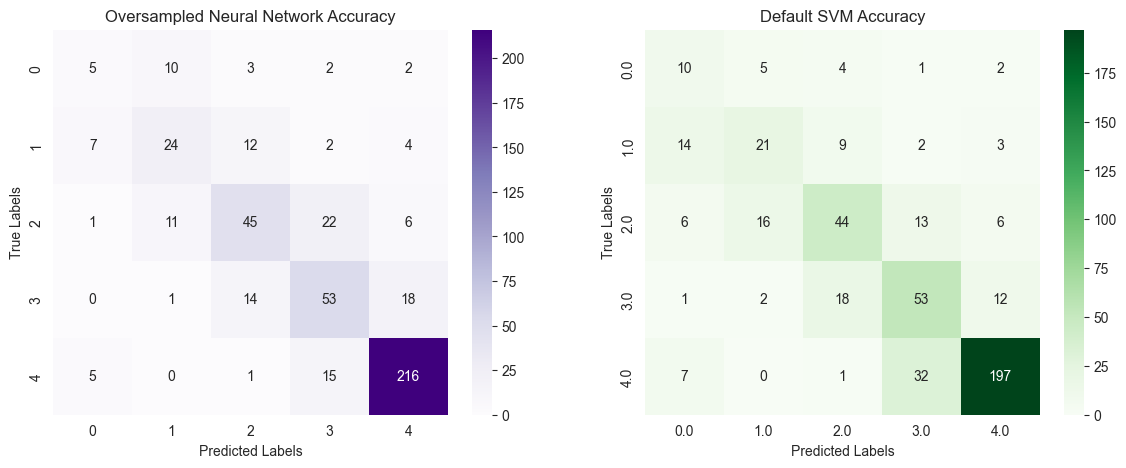

In [270]:
figureCompare, axes = plt.subplots(1, 2, figsize=(14, 5))

#plot heatmap of the main neural network accuracy
sns.heatmap(cmOversampled,annot=True,fmt="d",cmap="Purples", cbar=True, ax=axes[0])
axes[0].set_title('Oversampled Neural Network Accuracy')

#plot heatmap of the main svm
sns.heatmap(cmDefault,annot=True,fmt="d",cmap="Greens", cbar=True,xticklabels=default_svm.classes_,yticklabels=default_svm.classes_, ax=axes[1] )
axes[1].set_title('Default SVM Accuracy')

#set labels
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")
#plt.savefig()
plt.show()


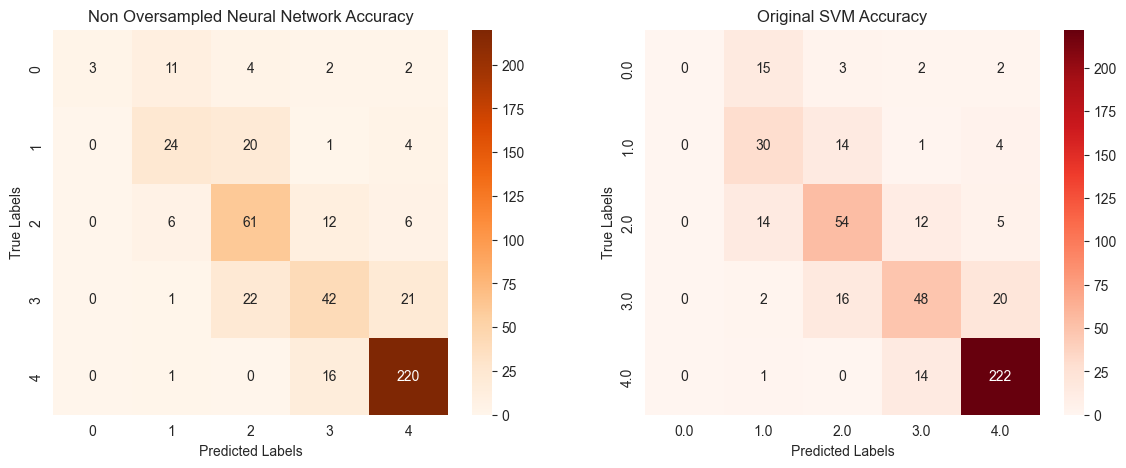

In [271]:
figureCompareNonOversampled, axes = plt.subplots(1, 2, figsize=(14, 5))

#heatmap of non oversampled neural netowrk
sns.heatmap(cmNonOversampled,annot=True,fmt="d",cmap="Oranges", cbar=True, ax=axes[0])
axes[0].set_title('Non Oversampled Neural Network Accuracy')

#heatmap of non oversampled svm
sns.heatmap(cmOriginal,annot=True,fmt="d",cmap="Reds", cbar=True,xticklabels=svm_original.classes_,yticklabels=svm_original.classes_, ax=axes[1] )
axes[1].set_title('Original SVM Accuracy')

#labels
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.show()

In [272]:
#compares accuracies between baseline classifier, neural network and svm
print("ZeroR baseline classifier: "+str(accuracy_zeroR))
print("Neural Network Model Accuracy: " +str(score))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_resampled))

ZeroR baseline classifier: 0.49478079331941544
Neural Network Model Accuracy: 0.7160751565762005
SVM Accuracy: 0.6471816283924844


From the above results you can see that both the svm and the neural network outperformed the baseline classifier accuracy, with the neural network obtaining the greatest increase.